## Лабораторная работа №1. Грузоперевозки




**Текстовое описание модели:**

В распоряжении компании грузовики 2 типов: малогабаритные и грузовые. Два типа заявок соответственно: малые перевозки и крупные. Каждая заявка появляется по закону Пуассона, со своей интенсивностью. На каждый заказ необходимо разное время. Для малогабаритных заказов длительность в среднем меньше, чем для крупногабаритных. Время равномерно распределено в определённых границах, своих для каждого типа заказов. Моделируется обслуживание.

**Время в модели**

Дискретное время, шаг 1 минута. Время моделирования - задаётся при запуске модели.

**Параметры модели**

- `n_small` - кол-во малогабаритных машин в компании
- `n_large` - кол-во грузовых машин в компании
- `small_intencity` - интенсивность поступления малых заказов (в мин.)
- `large_intencity` - интенсивность поступления крупных заказов (в мин.)
- `model_time` - Время, на протяжении которого моделируем (в мин.)
- `time_ranges` - Границы времени исполнения заказов в формате [[a,b],[c,d]]
- `plot_graphs` - Строить ли графики (нужно при многочисленном моделировании с разными параметрами)

**Реализация**

In [25]:
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl
mpl.style.use('seaborn')
import seaborn as sns
import numpy as np

In [676]:
class Order():
    def __init__(self, order_type, order_time):
        self.size = order_type
        self.time = order_time
        self.stage = 0
        self.queue_time = 0

def ProcessNewOrders(order_type, order_num, time_range):
    return [Order(order_type,np.random.randint(time_range[0],
            time_range[1]+1)) for _ in range(order_num)]
        
def CargoModel(n_small,
               n_large, 
               small_intencity, 
               large_intencity,
               model_time,
               time_ranges,
               plot_graphs = True
              ):
    x = np.arange(model_time)
    queue_times = [[],[]]
    free_vehicles = [n_small, n_large]
    orders = []
    for i in x:
        small_orders = np.random.poisson(small_intencity)
        large_orders = np.random.poisson(large_intencity)
        orders += (ProcessNewOrders(0, small_orders, time_ranges[0]) 
                   + ProcessNewOrders(1, large_orders, time_ranges[1]))
        next_orders = []
        for order in orders:
            s = order.size
            if order.stage == 1:
                order.time -= 1
                if order.time == 0:
                    free_vehicles[s] += 1
                    queue_times[s].append(order.queue_time)
                else:
                    next_orders.append(order)
            else:
                next_orders.append(order)
                if free_vehicles[s]:
                    order.stage = 1
                    free_vehicles[s] -= 1
                else:
                    order.queue_time += 1
        orders = next_orders
    if plot_graphs:
        print("Наибольшее время  обработки заказа малогаб./груз.: ",
              np.max(queue_times[0]),"/", np.max(queue_times[1]))
        print("Среднее время  обработки заказа малогаб./груз.: ",
              np.mean(queue_times[0]),"/", np.mean(queue_times[1]))
        _, ax = plt.subplots(figsize=(15, 7))
        plt.hist([queue_times[0],queue_times[1]], 
                 bins=20,label=['Малогаб.', 'Грузовые'],stacked = True)
        ax.set_xlabel('Время ожидания')
        ax.legend()
        _, ax = plt.subplots(figsize=(15, 7))
        ax.plot(np.arange(len(queue_times[0])),queue_times[0],
                label='Время ожидания, малогаб.')
        ax.plot(np.arange(len(queue_times[1])),queue_times[1],
                label='Время ожидания, грузовые')
        ax.set_xlabel('Кол-во заказов')
        ax.legend()
    return [np.max(queue_times[0]), 
            np.max(queue_times[1])], [np.mean(queue_times[0]),
            np.mean(queue_times[1])]

**Эксперименты**


1) Найти оптимальные решения для данной модели. То есть найдём такое количество машин, что вместе их будет как можно меньше, а время ожидания обработки будет минимальным. Для этого построим тепловую карту по двум параметрам: количество тех и других машин для среднего времени ожидания малых и крупных заказов.

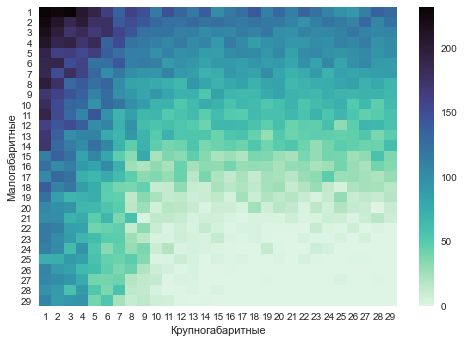

In [677]:
sm_v = np.arange(1,30)
la_v = np.arange(1,30)
res = np.zeros((len(sm_v),len(la_v)))
for i in range(len(la_v)):
    for j in range(len(sm_v)):
        _, a  = CargoModel(sm_v[j],la_v[i],0.4,0.12,600,
                           [[15,90],[45,120]],False)
        res[j,i] = np.mean(a) 
        
sns.heatmap(res,xticklabels=la_v,yticklabels=sm_v,cmap="mako_r")
plt.xlabel("Крупногабаритные")
plt.ylabel("Малогабаритные")
pass

Понятно, что таким образом можно легко находить оптимальное число машин. Для данных параметров - это около 22/13 машин соответственно. При меньшем числе получается слишком большое среднее время ожидания.

2) Найти состояние равновесия когда очередь обслуживается в течении 24 часов модельного времени. Примем за состояние равновесия такое состояние, что время ожидания не растёт в бесконечность. Попробуем найти такие параметры.

Наибольшее время ожидания обработки заказа малогаб./груз.:  7 / 19
Среднее время ожидания обработки заказа малогаб./груз.:  0.12301587301587301 / 0.8145161290322581


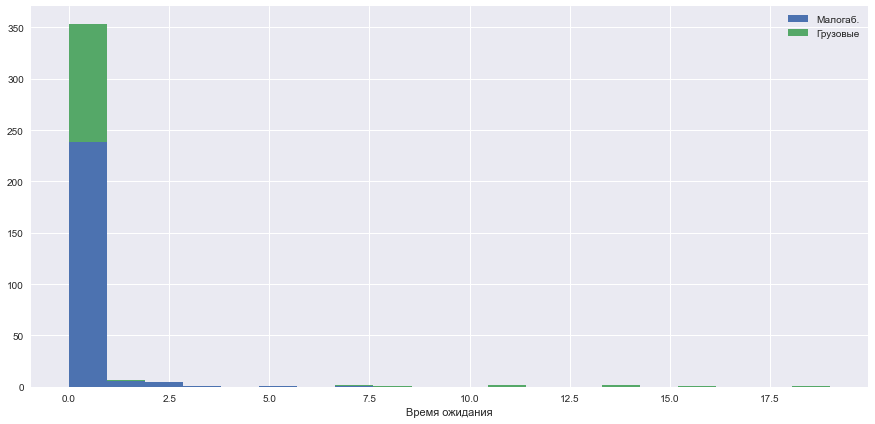

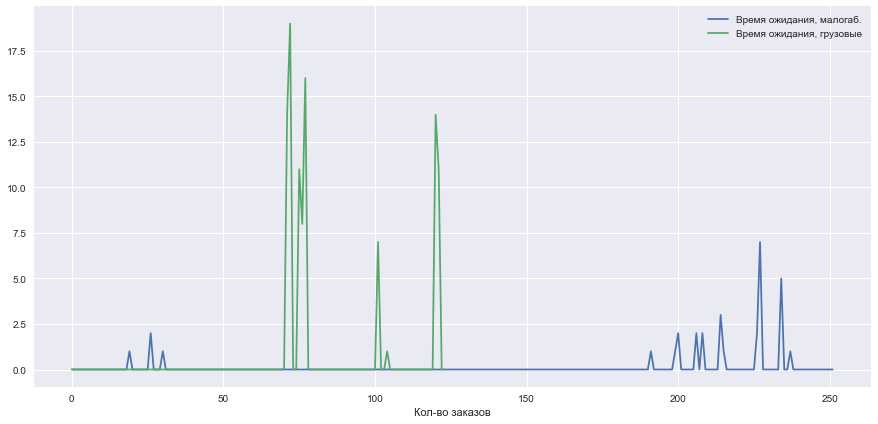

In [406]:
CargoModel(14,11,0.2,0.1,1440,[[15,90],[45,120]])
pass

Подобраны такие параметры, что в основном время ожидания нулевое. Иногда получаются простои. Можно посмотреть, что будет при уменьшении числа машин.

Наибольшее время ожидания обработки заказа малогаб./груз.:  71 / 114
Среднее время ожидания обработки заказа малогаб./груз.:  12.728301886792453 / 32.4921875


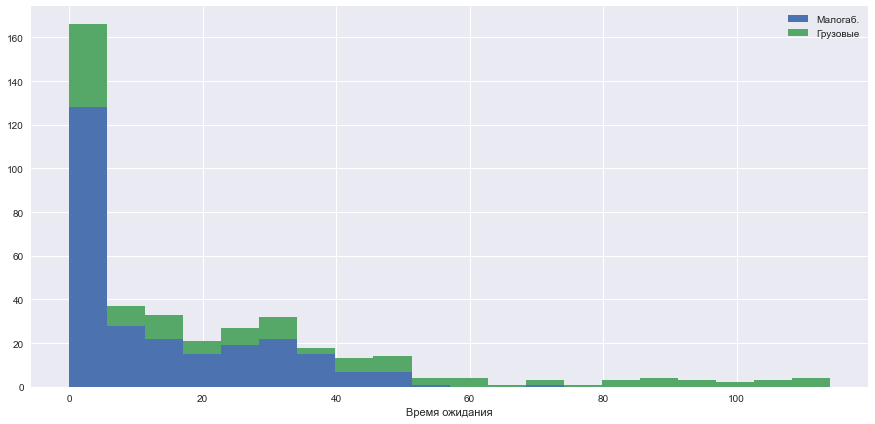

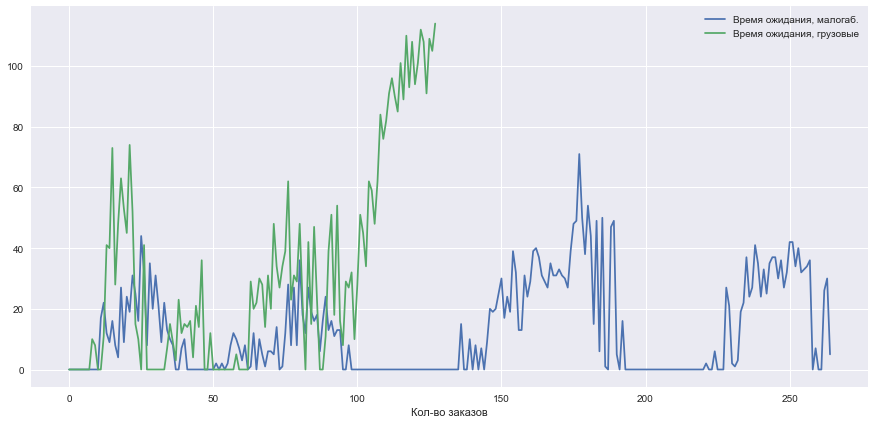

In [407]:
CargoModel(11,8,0.2,0.1,1440,[[15,90],[45,120]])
pass

Очередь нарастает, время ожидания стремится в бесконечность при дальнейшем обслуживании. 

## Лабораторная работа №2. Университет




**Текстовое описание модели:**

Смоделировать заполнение университета студентами. В систему поступают студенты (кто-то приходит чуть раньше, кто-то чуть позже) по нормальному закону распределения, $ N(начало \ пары, \sigma^2) $ , проходят через вход и заполняют аудитории. Время, которое нужно пройти до аудитории для всех, кто пришёл во время X зависит от количества, пришедшего в минуту X. Студенты опоздавшие на 15 минут к занятиям не допускаются. Смоделировать модель и проанализировать ее. Определить заполняемость университета. 

**Время в модели**

Дискретное время, шаг 1 минута. Время моделирования 60 минут (45 минут до пары и 15 минут после начала, далее ситуация не меняется).

**Параметры модели**

- `student_number` - Количество студентов, которые должны прийти на пару
- `sigma` - Дисперсия распределения времени прихода, чем больше - тем более раньше и позже приходят студенты
- `croud_factor` - Влияние толпы на время нужное, чтобы дойти до аудитории.
- `plot_graphs` - Строить ли графики (нужно при многочисленном моделировании с разными параметрами)

**Реализация**

In [192]:
def ModelUniversity(student_number, 
                    sigma = 6,
                    croud_factor = 1, 
                    plot_graphs = True):
    
    lesson_start = 45
    
    arrive_times = [round(np.random.normal(lesson_start, sigma))
                    for i in range(student_number)]
    unique, counts = np.unique(arrive_times, return_counts=True)
    pack = dict(zip(unique, counts))
    
    real_arrive_times = [[u + round(c*croud_factor)]*c 
                         for (u,c) in pack.items()]
    process_ready_times = [t for same_times in real_arrive_times 
                           for t in same_times]
    unique, counts = np.unique(process_ready_times, 
                               return_counts=True)
    pack = dict(zip(unique, counts))
    
    x = np.arange(60)
    arrived = [0 if i not in pack else pack[i] for i in x] 
    acc = 0
    for i in range(60):
        acc += arrived[i]
        arrived[i] = acc
        
    total_arrived = arrived[-1]
    
    if plot_graphs:
        print('Распределение времени прихода:')
        plt.hist(arrive_times,bins=20)
        plt.show()
        print('График прибытия студентов:')  
        plt.subplots()
        plt.ylim([0,student_number])
        plt.plot(x,arrived,label='Зашло в аудиторию')
        plt.legend()
        plt.show()
    return total_arrived

Запустим имитацию:

Распределение времени прихода:


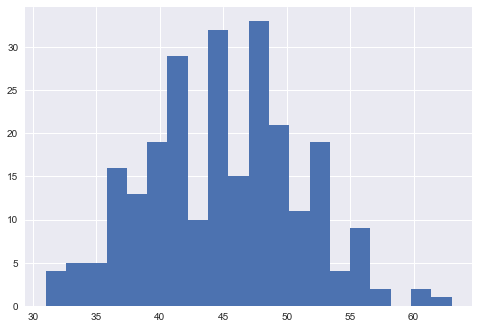

График прибытия студентов:


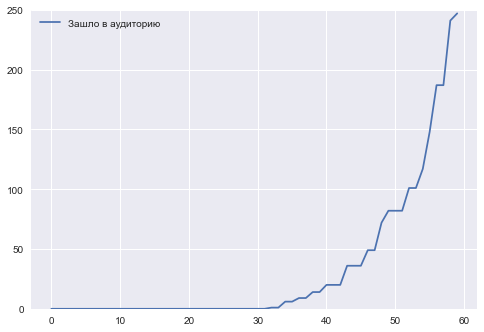

На пару пришло 247 студентов.


In [194]:
n = ModelUniversity(250,croud_factor = 0.6)
print('На пару пришло', n, 'студентов.')

При малом влиянии фактора толпы почти все студенты могут дойти вовремя, особенно если их немного. Если же число студентов увеличить не снижая фактора, то мало кто сможет успеть на пару:

Распределение времени прихода:


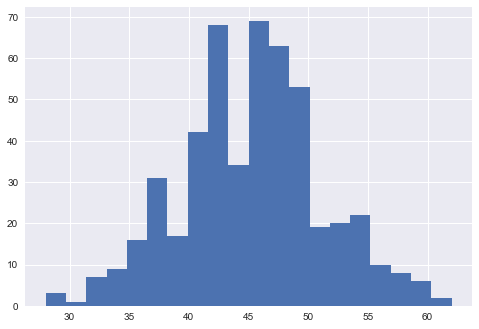

График прибытия студентов:


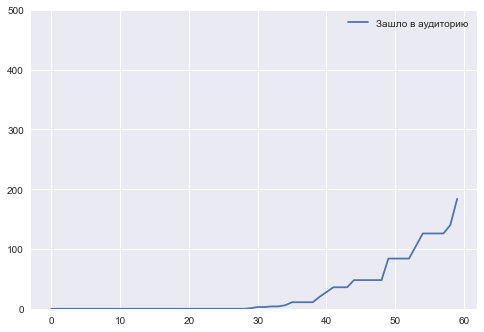

На пару пришло 184 студентов.


In [199]:
n = ModelUniversity(500,croud_factor = 0.6)
print('На пару пришло', n, 'студентов.')

## Лабораторная работа №3. Конвейер


**Текстовое описание модели:**

Моделируется конвейер с определённым числом ступеней. Длительность выполнения операции на каждой  ступени задаются. К первой ступени регулярно поставляются необходимые для сборки детали. Сдвиг конвейера происходит за единицу времени. Определить оптимальный период поставки деталей и длительность выполнения операций. Считаем за простой конвейера на ступени то время, когда операций на ней не выполнялось. Критерий оптимальности - минимум суммы времён простоя на каждой ступени.

Пример одного кадра анимации:



Где X - незанятое место на этапе, если ранее не завезли деталей.
Числами обозначается время, оставшееся до конца обработки на данном этапе.
В начале указана длина очереди прибывших деталей, а в конце - число изготовленных продуктов.

**Время в модели**

Дискретное время, шаг 1 секунда. Время моделирования - задаётся при запуске модели.

**Параметры модели**

- `stage_number` - Число ступеней конвейера, >=1
- `operation_times` - Времена обработки на ступенях
- `delivery_period` - Период, через который детали доставляются к первой ступени
- `model_time` - Время, на протяжении которого моделируем (в сек.)
- `plot_graphs` - Строить ли графики (нужно при многочисленном моделировании с разными параметрами)
- `animate` - Строить ли анимацию конвейейра
  
**Реализация**

In [29]:
from time import sleep
from IPython.display import clear_output, display

In [91]:
class Product():
    def __init__(self, t):
        self.time_on_stage = t
def ModelPipeline(stage_number, 
                  operation_times,
                  delivery_period,
                  model_time,
                  animate = True):
    conveyor = [None for _ in range(stage_number)]
    x = np.arange(model_time)
    start_queue = 0
    delay_sum = 0
    produced = -stage_number
    for i in x:
        if animate:
            clear_output(wait=True)
            print (start_queue, ' ===> ||', end='')
            for st in conveyor:     
                if st is None:
                    print('X->',end = '')
                else:
                    print(st.time_on_stage,'->', end = '')
            print('|| ===> ', max(produced, 0))
            sleep(0.5)
        if i%delivery_period == 0:
            start_queue += 1
        can_move = True
        for st in conveyor:
            delay_sum += 1
            if st is not None:
                if st.time_on_stage > 0:
                    st.time_on_stage -= 1
                    delay_sum -=1
                    can_move = False
        if can_move:
            delay_sum -= stage_number
            conveyor.pop(-1)
            produced += 1
            ins = None
            if start_queue > 0:
                start_queue -= 1
                ins = Product(operation_times[0])
            conveyor = [ins] + conveyor
            for k in range(1,len(conveyor)):
                if conveyor[k] is not None:
                    conveyor[k].time_on_stage = operation_times[k]
        
    return produced, delay_sum, start_queue

Пример идеального конвейера, где все операции выполняются одинаковое время t, а подвоз осуществляется каждые t+1 секунд, поскольку 1 секунда нужна на сдвиг конвейера. Простои ненулевые за счёт того, что конвейер не сразу заполнен.

In [92]:
pr, ds, _ = ModelPipeline(6, [2,2,2,2,2,2],3,40)
print('Произведено: ', pr)
print('Простоев суммарно: ', ds)

0  ===> ||0 ->0 ->0 ->0 ->0 ->0 ->|| ===>  7
Произведено:  8
Простоев суммарно:  30


Задача поиска оптимальных времён тривиальна, потому что для любого конвейера известно: производительность конвейера равна производительности самой медленной его части. Нужно просто брать одинаковые времена. Рассмотрим более интересный случай, с разными временами выполнения и требованием найти время подвозки такое, чтобы не создавалась очередь и простои были минимальны.

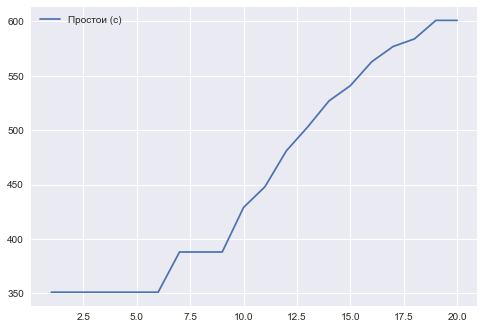

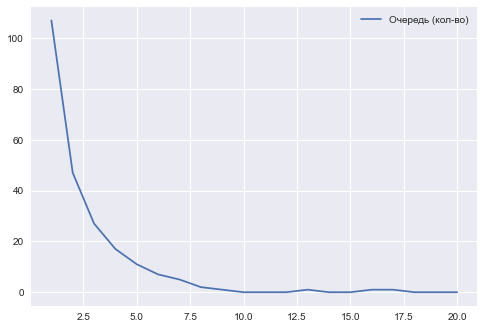

In [109]:
nt = np.arange(1,21)
qm = np.zeros(len(nt))
dsm = np.zeros(len(nt))
for i in range(len(nt)):
    _, dsm[i], qm[i] = ModelPipeline(8, [5,8,6,7,8,4,9,7],nt[i],120, 
                                     animate = False)
plt.plot(nt,dsm, label='Простои (c)')
plt.legend()
plt.subplots()
plt.plot(nt,qm,  label='Очередь (кол-во)')
plt.legend()
pass

Легко увидеть, что чем реже мы подвозим детали - тем меньше очередь в начале конвейера. При этом у графика простоя всегда будет некоторое базовое значение, обусловленное заполнением конвейера и неидеальной конструкцией, а затем оно повышается при нехватке материала на старте. То есть налицо трейд-офф между размером очереди в начале и длиной простоя. Это уже многокритериальная оптимизация, но можно сказать, что время около 6 секунд будет оптимальным для минимума суммы этих значений. Если отдать предпочтение минимизации размера очереди, то лучше подвозить материалы раз в 8-9 секунд.
Таким образом можно всегда найти оптимальное время подвозки.


## Лабораторная работа №4. Банк



**Текстовое описание модели:**

Банк с несколькими окнами обслуживания, в систему приходят клиенты по закону Пуассона с некоторым средним значением и соответственно со своими запросами, время выполнения каждого запроса случайное, от 5 до 30 минут. Смоделировать банк, проанализировать сервис, чтобы клиенты были довольны обслуживанием, удовлетворенность зависит от времени простоя в очереди. Каждые 4 часа происходит перерыв в несколько минут, посетители это знают и в это время поток сокращается в три раза. Люди подходят в то окно, где меньше очередь.

**Время в модели**

Дискретное время, шаг 1 минута. Время моделирования - задаётся при запуске модели.

**Параметры модели**

- `windows_number` - Число окон обслуживания
- `clients_intencity` - интенсивность поступления клиентов (в мин.)
- `break_length` - длина перерыва
- `model_time` - Время, на протяжении которого моделируем (в мин.)
- `plot_graphs` - Строить ли графики (нужно при многочисленном моделировании с разными параметрами)

**Реализация**

In [678]:
class Client():
    def __init__(self):
        self.service_time = np.random.randint(5,31)
        self.queue_time = 0

def BankModel(windows_number,
               clients_intencity, 
               break_length,
               model_time, 
               plot_graphs = True 
              ):
    windows = windows = [[] for _ in range(windows_number)]
    x = np.arange(model_time)
    queue_times = []
    on_break = False
    break_left = 0
    for i in x:
        
        new_clients = np.random.poisson(clients_intencity)
        
        for j in range(new_clients):
            queue_lengths = [len(w) for w in windows]
            windows[np.argmin(queue_lengths)].append(Client())
            
        if (i+1)%240 == 0:
            on_break = True
            break_left = break_length
            clients_intencity/=3
            
        if break_left > 0:
            break_left -= 1
        elif on_break:
            on_break = False
            clients_intencity*=3
            
        for w in windows:
            if w: 
                for k in range(1,len(w)):
                    w[k].queue_time += 1
                if not on_break:
                    if w[0].service_time > 0:
                        w[0].service_time -= 1
                    else:
                        queue_times.append(w[0].queue_time)
                        w.pop(0)
                else:
                    w[0].queue_time += 1
    if plot_graphs:
        print("Наибольшее время ожидания в очереди: ", 
              np.max(queue_times))
        print("Среднее время ожидания в очереди: ", 
              np.mean(queue_times))
        
        _, ax = plt.subplots(figsize=(15, 7))
        plt.hist(queue_times,20)
        ax.set_xlabel('Время ожидания')
        
        _, ax = plt.subplots(figsize=(15, 7))
        ax.plot(np.arange(len(queue_times)),
                queue_times,label='Время ожидания')
        ax.set_xlabel('Кол-во заказов')
        ax.legend()
    return np.max(queue_times), np.mean(queue_times)
    
    

**Эксперименты**


1) Проанализируем сервис. Найдём такое число окон и наибольшее время перерыва, чтобы при заданной интенсивности максимальное время ожидания не превышало получаса. Для этого опять построим тепловую карту по переменным размера окон и времени перерыва.

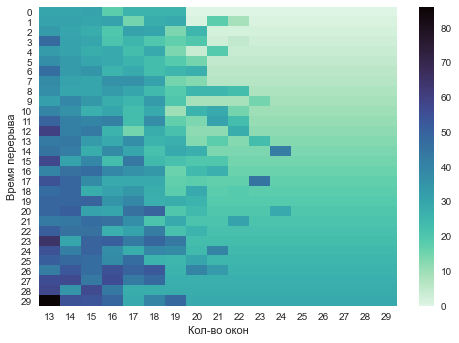

In [574]:
windows_numbers = np.arange(13,30)
break_times = np.arange(0,30)
res = np.zeros((len(break_times),len(windows_numbers)))
for i in range(len(windows_numbers)):
    for j in range(len(break_times)):
        m,_  = BankModel(windows_numbers[i],0.6,
                         break_times[j],1000,False)
        res[j,i] = m
        
sns.heatmap(res,xticklabels=windows_numbers,
            yticklabels=break_times,cmap="mako_r")
plt.xlabel("Кол-во окон")
plt.ylabel("Время перерыва")
pass


Решение найдено: достаточно взять около 25 окон и можно получить 15-20 минут перерыва. Видно, что после перехода некоего порога по количеству окон оно больше не влияет на максимальное время ожидания, весь вклад идёт от времени перерыва.

Для бесперерывной работы можем найти максимальное число окон, при котором банк совершенно точно не справится с потоком клиентов и очередь будет расти бесконечно.

Наибольшее время ожидания в очереди:  995
Среднее время ожидания в очереди:  468.0988040478381


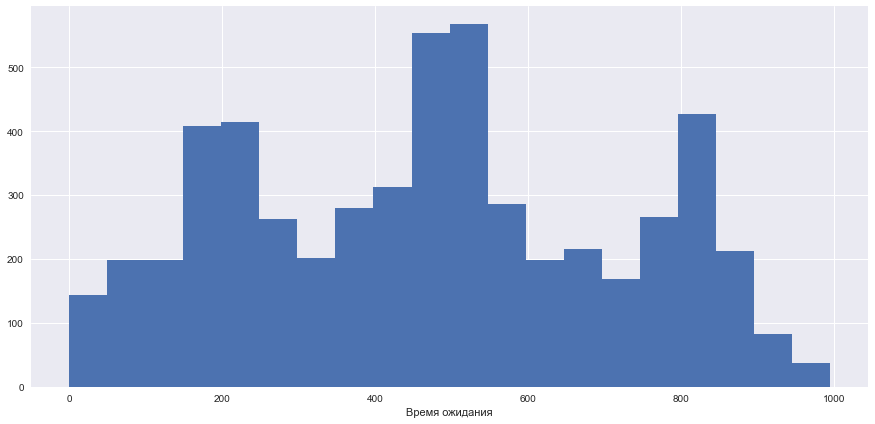

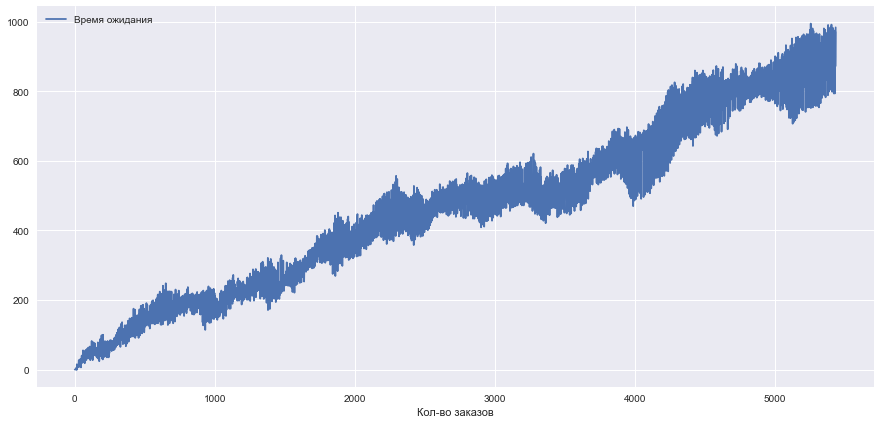

In [593]:
BankModel(10,0.6,0,10000)
pass

Наибольшее время ожидания в очереди:  223
Среднее время ожидания в очереди:  92.53703077443355


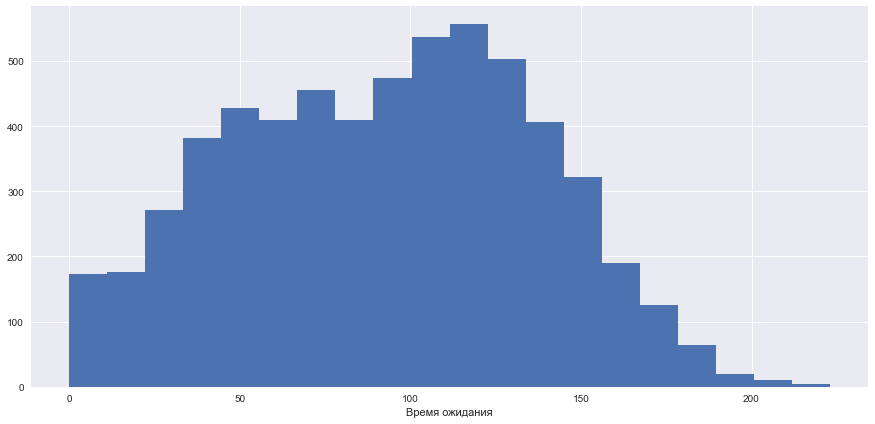

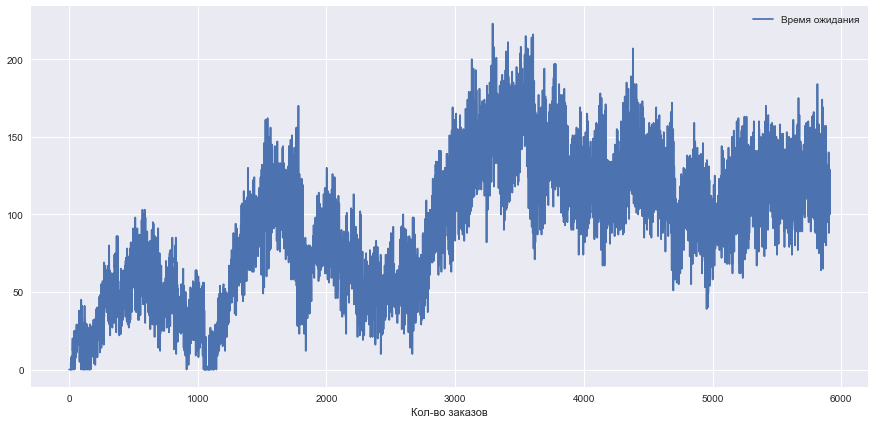

In [594]:
BankModel(11,0.6,0,10000)
pass

В данном случае такое пороговое значение - 10 окон.


## Лабораторная работа №5. Теория разбитых окон

**Текстовое описание модели:**

Моделируется жилой район, с определённым количеством окон, его населяет фиксированное число жителей. Каждый день жители проходят по случайным местам района (максимальное число посещений задаётся) и решают, будут ли они бить стекло или нет. На это решение влияют следующие факторы: порядочность конкретного жителя и число разбитых окон вокруг, которые он увидел. Сама теория предполагает, что планка допустимого понижается при наблюдении правонарушений вокруг, это относится не только к окнам, подробнее: https://en.wikipedia.org/wiki/Broken_windows_theory . Через некоторое число дней окна чинят, а нарушителя могут наказать, немного повысив ему порядочность. Эти опции тоже регулируются. Исследуем поведение модели с различными параметрами.

**Время в модели**

Дискретное время, шаг 1 сутки. Время моделирования - задаётся при запуске модели.

**Параметры модели**

- `windows_number` - Число окон на районе
- `residents_number` - Количество жителей района
- `max_visits` - Максимальное число мест, которые может посетить житель в день
- `view_rad` - Радиус "обзора" битых окон
- `days_to_fix` - Сколько дней требуется на починку окна
- `fix_limit` - Лимит на починку в день
- `punishments` - Присутствуют ли в системе неотвратимые наказания
- `model_time` - Время, на протяжении которого моделируем (в сутках)
- `decency_scale` - Параметр для управления общей порядочностью района. Можно сделать неблагополучный или сильно порядочный район. Само распределение порядочности моделируется через нормальное распределение с преобразованием, чтобы получить реалистичный вид, где большинство людей порядочны (ближе к 1) и есть небольшое число маргиналов около нуля. Увеличение этого параметра ведёт к выравниванию порядочности.
- `plot_graphs` - Строить ли графики (нужно при многочисленном моделировании с разными параметрами)


**Структурная модель**
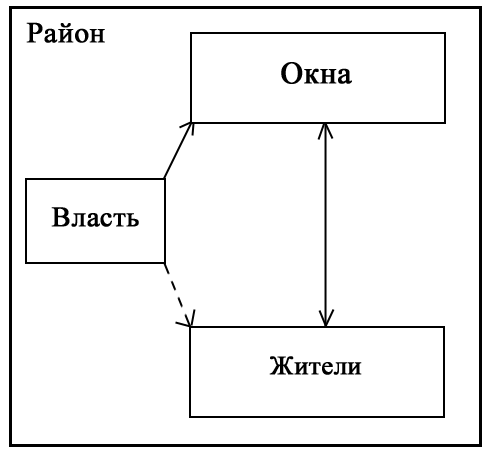

**Математическая модель**

Все входные переменные называются так, как указано выше.
Порядочность жителя - случайная величина со следующим распределением: 

$$ |1-|N(0,decency \ scale)|| $$

Каждый день, для каждого жителя:

1. n_visits = случайное число из диапазона [0, max_visits]

2. Посещаем n_visits мест:

    - Выбор случайного окна из диапазона [0, windows_number - 1]

    - Со следующей вероятностью житель разбивает окно $$ (1 - resident.decency)^4 * \frac{1+nbroken}{2*viewrad + 1}$$

    - Если в системы включены наказания, то у нарушителя resident.decency+=0.05 вплоть до 1

3. Проверяем все сломанные окна на районе, если для окна прошло days_to_fix дней с разбития, то чиним его.



**Реализация**

In [655]:
class Window():
    def __init__(self):
        self.broken = False
        self.until_repair = 0
        
def CollectRangeInfo(windows, position, view_rad):
    possible_targets = []
    broken_number = 0
    for i in range(max(0,position-view_rad), 
                   min(len(windows), position + view_rad + 1)):
        w = windows[i]
        if w == False:
            possible_targets.append(i)
        else:
            broken_number += 1
    return possible_targets, broken_number

# Здесь фактор (1-порядочность) возводится в степень, чтобы люди 
# с порядочностью близкой к 1 очень редко били окна.
# Иначе получается, что они могут внезапно взять и побить окно 
# с шансом 1% на выборке в год безо всяких причин, 
# что даёт эффект "района правонарушителей", где больше половины хоть 
# раз разбило окно.

def WillBrake(decency, broken_number, view_rad):
    return np.random.rand() < ((1 - decency)**4)*
                        (1 + broken_number)/(view_rad * 2 + 1)
                                            
def BrokenWindowsModel(windows_number = 2000,
                       residents_number = 200,
                       max_visits = 4, 
                       view_rad = 5,
                       days_to_fix = 3,
                       fix_limit = 10,
                       punishments = False,
                       model_time = 200,
                       decency_scale = 0.23,
                       plot_graphs = True):
    
    
    residents = [abs(1-abs(np.random.normal(scale=decency_scale))) 
                 for _ in range(residents_number)]
    windows = [False]*windows_number
    broken = {}
    breakers = {}
    broken_history = []
    x = np.arange(model_time)
    if plot_graphs:
        print('Распределение порядочности жителей района:')
        plt.hist(residents,30)
        plt.show()
    for i in x:
        for i, res  in  enumerate(residents):
            visits = np.random.randint(max_visits + 1)
            visits = [np.random.randint(windows_number) 
                      for _ in range(visits)]
            for v in visits:
                targ, n_broken = CollectRangeInfo(windows, v, view_rad)
                if len(targ) > 0 and WillBrake(res, n_broken, view_rad):
                    ind = np.random.choice(targ)
                    windows[ind] = True
                    broken[ind] = days_to_fix
                    breakers[i] = 1
                    if punishments:
                        residents[i] = min(1, res + 0.05)
        broken_history.append(len(broken))
        to_remove = []
        j = 0
        for w in broken.keys():
            if (j>= fix_limit):
                break
            broken[w] -= 1
            if broken[w] == 0:
                windows[w] = False
                to_remove.append(w)
                j+=1
        for w in to_remove:
            del broken[w]
    
    if plot_graphs:
        _, ax = plt.subplots(figsize=(12, 6))
        print("Разбито окон в каждый день")
        ax.plot(x, broken_history)
        plt.show()
        if punishments:
            print("Вид распределения порядочности по \
                  результатам применения наказаний: ")
            plt.subplots()
            plt.hist(residents,30)
            plt.show()
        print("Соотношение бивших и не бивших")
        sns.countplot(x = [True for _ in range (len(breakers))] + 
            [False for _ in range(residents_number - len(breakers))])

**Эксперименты**


1) Посмотрим на стандартный благополучный район, без наказаний, где окна чинят за 1 день, а жители много ходят по району.

Распределение порядочности жителей района:


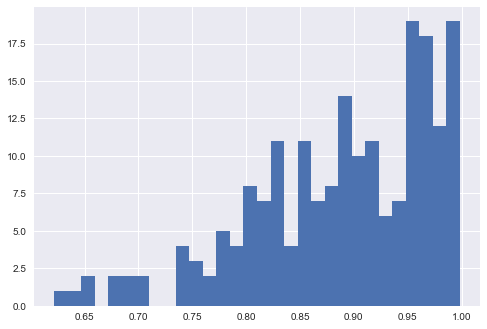

Разбито окон в каждый день


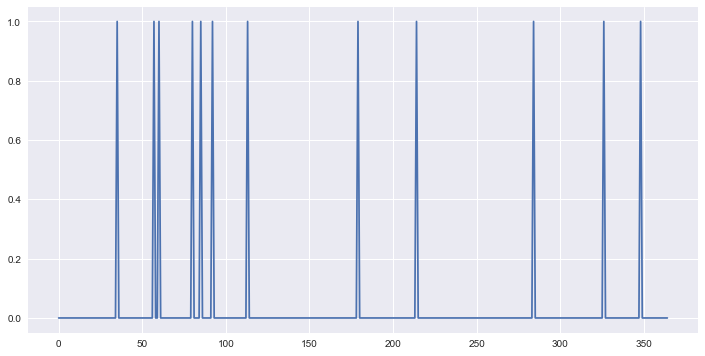

Соотношение бивших и не бивших


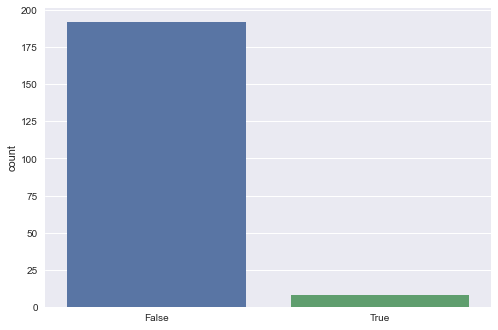

In [658]:
BrokenWindowsModel(max_visits = 15,
                   view_rad = 25, 
                   days_to_fix = 1,
                   fix_limit = 25, 
                   punishments = False, 
                   model_time = 365, 
                   decency_scale = 0.14)

Всё в полном порядке, иногда случаются инциденты, но очень редко. Окна били единицы, в системе где изначально большинство жителей добропорядочны наказания не сильно нужны.

2) Та же модель, но теперь население имеет в среднем более низкую порядочность, маргиналов намного больше 

Распределение порядочности жителей района:


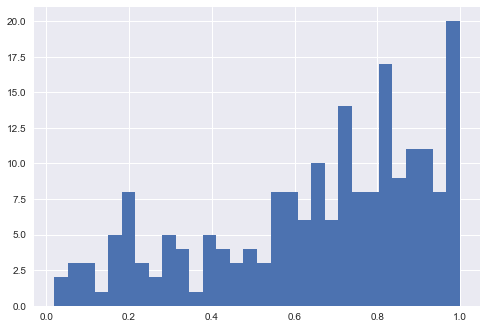

Разбито окон в каждый день


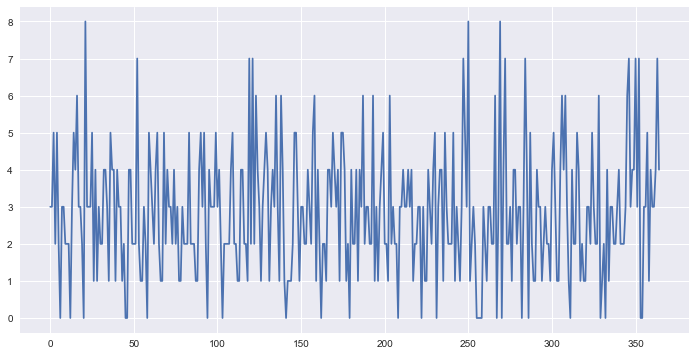

Соотношение бивших и не бивших


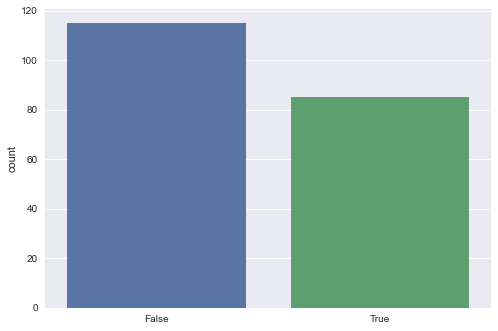

In [660]:
BrokenWindowsModel(max_visits = 15, 
                   view_rad = 25, 
                   days_to_fix = 1,
                   fix_limit = 25, 
                   punishments = False, 
                   model_time = 365, 
                   decency_scale = 0.45)

Каждый день разбито по 3-6 окон, половина жителей нарушает правила, но починка справляется с проблемой.
Стоит только замедлить темпы починки и всё станет совсем плохо:

Распределение порядочности жителей района:


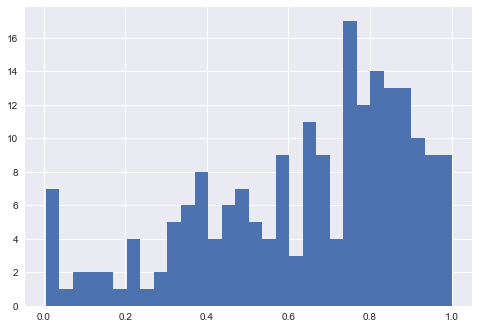

Разбито окон в каждый день


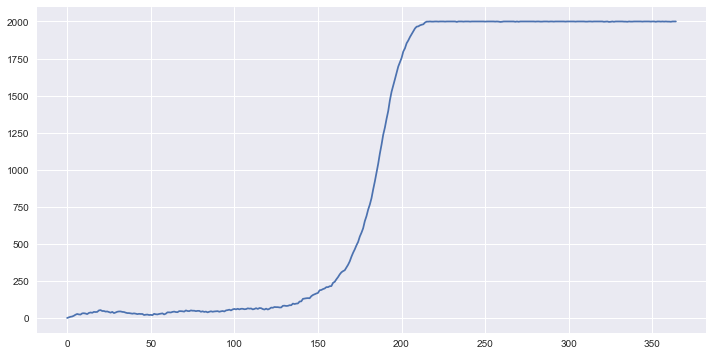

Соотношение бивших и не бивших


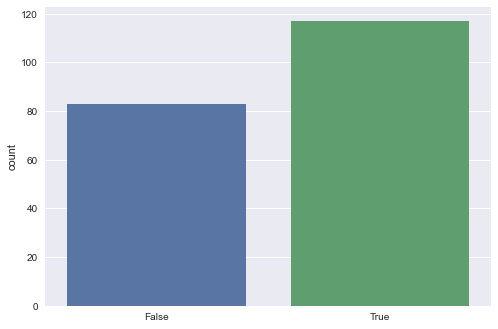

In [665]:
BrokenWindowsModel(max_visits = 15, 
                   view_rad = 25, 
                   days_to_fix = 6,
                   fix_limit = 10, 
                   punishments = False, 
                   model_time = 365, 
                   decency_scale = 0.45)

Район разрушен до основания, хотя всё что изменилось - добавилась небольшая группа людей,
начинающих бить окна без особой мотивации.
Остальные видят разруху и подключаются, отсюда такое соотношение. 
Всё же почти половина людей к этому отношения не имела.
Продолжим модифицировать систему и введём наказания:

Распределение порядочности жителей района:


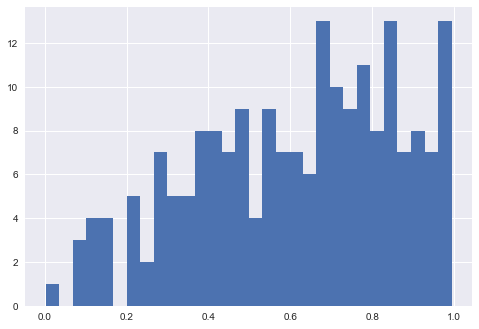

Разбито окон в каждый день


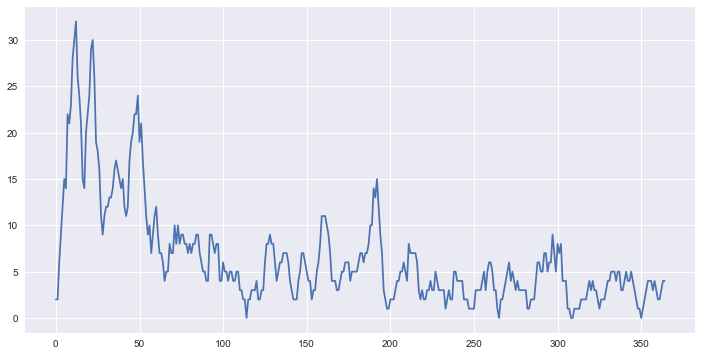

Вид распределения порядочности по результатам применения наказаний: 


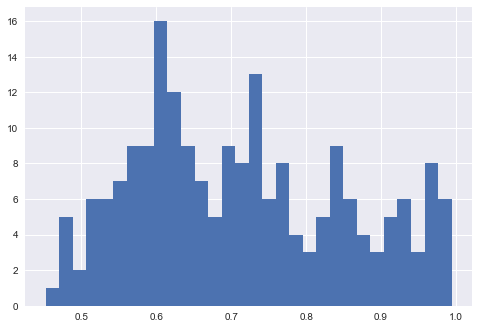

Соотношение бивших и не бивших


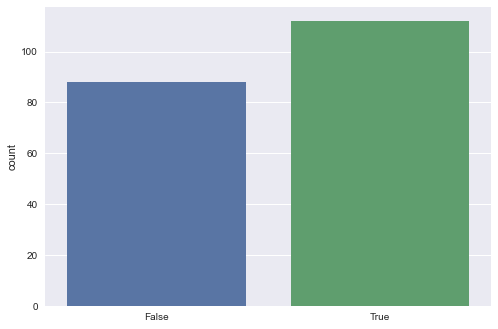

In [667]:
BrokenWindowsModel(max_visits = 15, 
                   view_rad = 25, 
                   days_to_fix = 6,
                   fix_limit = 10, 
                   punishments = True,
                   model_time = 365, 
                   decency_scale = 0.45)

Хотя ситуация не очень хорошая, но по крайней мере наказания смогли справиться с полным разрушением района. В реализации мера наказания фиксирована, если сделать наказание невероятно строгим и добавлять приличие за проступок не только нарушившему в большом размере, но и всем жителям понемногу в качестве устрашения, то битых окон вообще не будет. В реальности, конечно, такое работает плохо. Некоторым серьёзность наказания просто не помеха.

3) Последнее - неблагополучный район с быстрой починкой и наказаниями на большой дистанции (5 лет). Посмотрим на прогресс и процесс перевоспитания района.

Распределение порядочности жителей района:


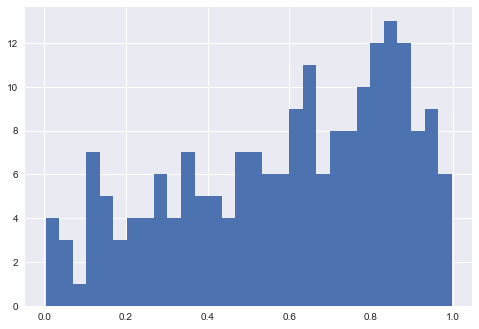

Разбито окон в каждый день


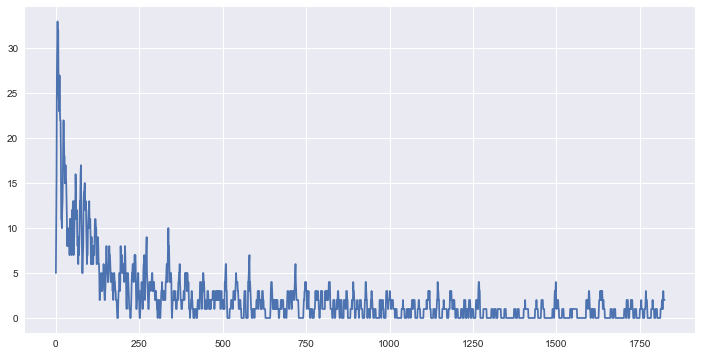

Вид распределения порядочности по результатам применения наказаний: 


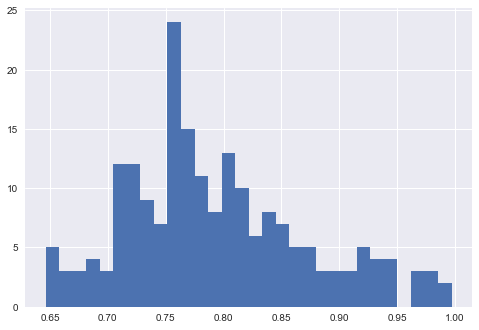

Соотношение бивших и не бивших


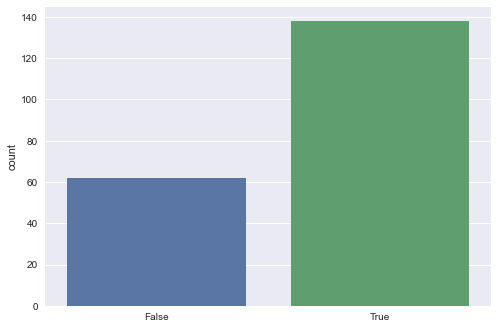

In [672]:
BrokenWindowsModel(max_visits = 15, 
                   view_rad = 25, 
                   days_to_fix = 5,
                   fix_limit = 15, 
                   punishments = True, 
                   model_time = 1825, 
                   decency_scale = 0.55)

На этой модели можно провести ещё очень много экспериментов, но на данный момент можно сделать вывод, что если ситуацию в неблагополучных районах своевременно не регулировать, то можно получить разрушенный район из совершенно нового. Пример из жизни: https://en.wikipedia.org/wiki/Pruitt%E2%80%93Igoe . В благополучных районах наказание и скорость починки на ситуацию почти никак не влияют, в плохих же - влияют критически. 